<a href="https://colab.research.google.com/github/subha9542/Datamining/blob/master/Data_mining_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sys
import random
from itertools import combinations 
eps = np.finfo(float).eps
from numpy import log2 as log
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

1. [25] Write Python code to perform the following tasks.

(a) Read data from hwk06-01.csv into a DataFrame df1.

In [2]:
df1 = pd.read_csv("hwk06-01.csv",sep = '\t')
df1.head

<bound method NDFrame.head of    department  status     age    salary  count
0       sales  senior  31..35  46k..50k     30
1       sales  junior  26..30  26k..30k     40
2       sales  junior  31..35  31k..35k     40
3     systems  junior  21..25  46k..50k     20
4     systems  senior  31..35  66k..70k      5
5     systems  junior  26..30  46k..50k      3
6     systems  senior  41..45  66k..70k      3
7   marketing  senior  36..40  46k..50k     10
8   marketing  junior  31..35  41k..45k      4
9   secretaty  senior  46..50  36k..40k      4
10  secretaty  junior  26..30  26k..30k      6>

(b) Create a new DataFrame df2 by replicating each row of df1 with the number of copies
as indicated in the count column. For example, the first row in df1 should appear 30
times in df2, second row in df1 40 times in df2, etc.


In [3]:
df2 = df1.loc[np.repeat(df1.index.values,df1['count'].to_numpy())].reset_index(drop=True)
df2

,department,status,age,salary,count
0,sales,senior,31..35,46k..50k,30
1,sales,senior,31..35,46k..50k,30
2,sales,senior,31..35,46k..50k,30
3,sales,senior,31..35,46k..50k,30
4,sales,senior,31..35,46k..50k,30
...,...,...,...,...,...
160,secretaty,junior,26..30,26k..30k,6
161,secretaty,junior,26..30,26k..30k,6
162,secretaty,junior,26..30,26k..30k,6
163,secretaty,junior,26..30,26k..30k,6


(c) Perform the one-of-kinds encoding on the categorical columns. For example, if a categorical attribute has three values “A”, “B”, and “C”, you will encode “A” as 0, “B” as
1, and “C” as 2. One way to do this in Python is to save the values in a list and use the
list index as the coding.

In [4]:
df2['department'] = df2['department'].astype('category')
df2['age'] = df2['age'].astype('category')
df2['salary'] = df2['salary'].astype('category')
#df2['status'] = df2['status'].astype('category')
cat_columns = df2.select_dtypes(['category']).columns
age_cat = dict( enumerate(df2['age'].cat.categories ) )
department_cat = dict( enumerate(df2['department'].cat.categories ) )
salary_cat = dict( enumerate(df2['salary'].cat.categories ) )
print(age_cat,'\n',department_cat,'\n',salary_cat)
df2[cat_columns] = df2[cat_columns].apply(lambda x: x.cat.codes)
df2

{0: '21..25', 1: '26..30', 2: '31..35', 3: '36..40', 4: '41..45', 5: '46..50'} 
 {0: 'marketing', 1: 'sales', 2: 'secretaty', 3: 'systems'} 
 {0: '26k..30k', 1: '31k..35k', 2: '36k..40k', 3: '41k..45k', 4: '46k..50k', 5: '66k..70k'}


,department,status,age,salary,count
0,1,senior,2,4,30
1,1,senior,2,4,30
2,1,senior,2,4,30
3,1,senior,2,4,30
4,1,senior,2,4,30
...,...,...,...,...,...
160,2,junior,1,0,6
161,2,junior,1,0,6
162,2,junior,1,0,6
163,2,junior,1,0,6


(d) Make sure that df2 does not have the column count.


In [5]:
df2 = df2.drop("count",axis=1)
df2

,department,status,age,salary
0,1,senior,2,4
1,1,senior,2,4
2,1,senior,2,4
3,1,senior,2,4
4,1,senior,2,4
...,...,...,...,...
160,2,junior,1,0
161,2,junior,1,0
162,2,junior,1,0
163,2,junior,1,0


2. [25] Write Python code to use sklearn.tree.DecisionTreeClassifier to learn a decision tree
using the df2 as the training data, and then use the decision tree to predict the status of a user
provided unseen data, such as


t =< department : systems, status :?, age : 28, salary : 50K >

Your program needs to convert the actual age and salary values into the codes for the corresponding ranges before using the decision tree to predict the status. Also, use the graphviz
package to display the learned decision tree.


In [6]:
def get_split_value(df,attribute,value):
    variables = df1[attribute].unique() 
    for i in variables:
        j,k = i.split('..')
        if value >= int(j.rstrip('k')) and value <= int(k.strip('k')):
            return i

department = 'systems'
age = 28
salary = 50

def get_codes(department,age,salary):
    dep = list(department_cat.keys())[list(department_cat.values()).index(department)]
    age = list(age_cat.keys())[list(age_cat.values()).index(get_split_value(df1,'age',age))]
    salary = list(salary_cat.keys())[list(salary_cat.values()).index(get_split_value(df1,'salary',salary))]
    return [dep,age,salary]
print("Converted codes for department,age and salary are:")
get_codes(department,age,salary)

Converted codes for department,age and salary are:


[3, 1, 4]

In [7]:
feature_cols = ['department','salary','age']
X = df2[feature_cols] # Features
y = df2.status # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train,y_train)

y_pred = clf.predict([get_codes(department,age,salary)])
print("Predicted class using Decision Tree is: ",y_pred)



Predicted class using Decision Tree is:  ['junior']


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


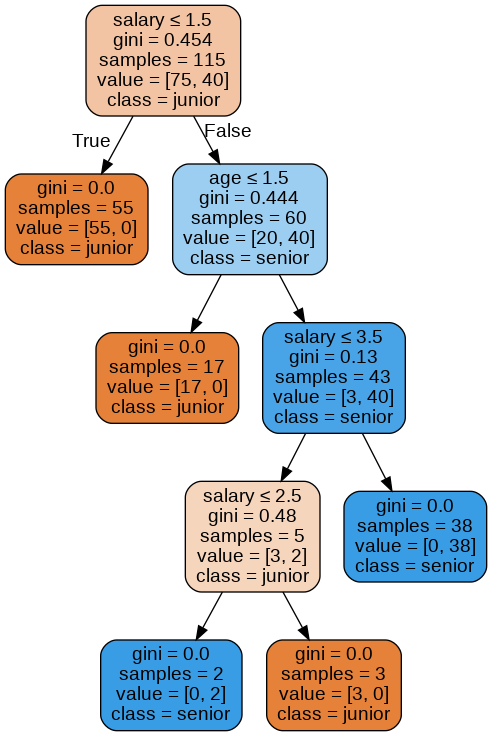

In [8]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['junior','senior'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('sales.png')
Image(graph.create_png())

3. [25] Write Python code to create another DataFrame df3 from df1 as follows.

(a) Replicate rows as described above


In [9]:
df3 = df1.loc[np.repeat(df1.index.values,df1['count'].to_numpy())].reset_index(drop = True)
df3

,department,status,age,salary,count
0,sales,senior,31..35,46k..50k,30
1,sales,senior,31..35,46k..50k,30
2,sales,senior,31..35,46k..50k,30
3,sales,senior,31..35,46k..50k,30
4,sales,senior,31..35,46k..50k,30
...,...,...,...,...,...
160,secretaty,junior,26..30,26k..30k,6
161,secretaty,junior,26..30,26k..30k,6
162,secretaty,junior,26..30,26k..30k,6
163,secretaty,junior,26..30,26k..30k,6


(b) Convert values in the age and salary columns to random values drawn from the specific
range for each row. For example, suppose the age of a row is “31..35”, replace it by a
random integer between 31 and 35 inclusively.


In [10]:
def get_random(value):
    j,k = value.split('..')
    ran = random.randint(int(j.rstrip('k')),int(k.strip('k')))
    return ran
for i in df3.index:
    df3.loc[i,'salary'] = get_random(df3['salary'][i])
    df3.loc[i,'age'] = get_random(df3['age'][i])
df3

,department,status,age,salary,count
0,sales,senior,33,47,30
1,sales,senior,33,50,30
2,sales,senior,35,49,30
3,sales,senior,32,48,30
4,sales,senior,31,48,30
...,...,...,...,...,...
160,secretaty,junior,26,29,6
161,secretaty,junior,27,30,6
162,secretaty,junior,26,30,6
163,secretaty,junior,30,27,6


(c) Perform the same encoding on column department

In [11]:
df3['department'] = df3['department'].astype('category')
cat_columns = df3.select_dtypes(['category']).columns
df3[cat_columns] = df3[cat_columns].apply(lambda x: x.cat.codes)
df3

,department,status,age,salary,count
0,1,senior,33,47,30
1,1,senior,33,50,30
2,1,senior,35,49,30
3,1,senior,32,48,30
4,1,senior,31,48,30
...,...,...,...,...,...
160,2,junior,26,29,6
161,2,junior,27,30,6
162,2,junior,26,30,6
163,2,junior,30,27,6


(d) Make sure there is no column count


In [12]:
df3.drop("count",axis=1,inplace = True)
df3

,department,status,age,salary
0,1,senior,33,47
1,1,senior,33,50
2,1,senior,35,49
3,1,senior,32,48
4,1,senior,31,48
...,...,...,...,...
160,2,junior,26,29
161,2,junior,27,30
162,2,junior,26,30
163,2,junior,30,27


4. [25] Write Python code to use sklearn.naive_bayes to learn a Guassian Naive Bayes classifier
using df3 as the training data, and use the learned predictive model to predict the status of a
user provided unseen data, for example,

t =< department : systems, status :?, age : 28, salary : 50K >

Again, you need to encode the department.

In [13]:
feature_cols = ['department','salary','age']
X1 = df3[feature_cols] # Features
y1 = df3.status # Target variable

X_train1, X_test, y_train1, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

model = GaussianNB()
model.fit(X_train1,y_train1)

dep = list(department_cat.keys())[list(department_cat.values()).index('systems')]
y_pred1 = model.predict([[dep,28,50]])
print("Predicted class using Gaussian Naive bayes is: ",y_pred1)

Predicted class using Gaussian Naive bayes is:  ['senior']
